In [442]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## **Spotify Dataset**

In [443]:
df = pd.read_csv("data/spotify_dataset.csv")

General info

In [444]:
df.shape

(114000, 21)

In [445]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [446]:
df.isna().sum()

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [447]:
df.duplicated().sum()

np.int64(0)

In [448]:
df.describe()

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,32909.109681,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,56999.500000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.250000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


Nulls in a row

In [449]:
df[df.isna().any(axis=1)]

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
65900,65900,1kR4gIb7nGxHPI3D2ifs59,NaN,NaN,NaN,0,0,False,0.501,0.583,...,-9.46,0,0.0605,0.69,0.00396,0.0747,0.734,138.391,4,k-pop


Duplicate tracks 

In [450]:
df['track_id'].duplicated().sum()

np.int64(24259)

In [451]:
df[df['track_id'].duplicated(keep=False)].sort_values('track_id')

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
15028,15028,001APMDOl3qtx1526T11n1,Pink Sweat$;Kirby,New RnB,Better,0,176320,False,0.613,0.471,...,-6.644,0,0.1070,0.316000,0.000001,0.1170,0.406,143.064,4,chill
103211,103211,001APMDOl3qtx1526T11n1,Pink Sweat$;Kirby,New RnB,Better,0,176320,False,0.613,0.471,...,-6.644,0,0.1070,0.316000,0.000001,0.1170,0.406,143.064,4,soul
85578,85578,001YQlnDSduXd5LgBd66gT,Soda Stereo,Soda Stereo (Remastered),El Tiempo Es Dinero - Remasterizado 2007,38,177266,False,0.554,0.921,...,-4.589,1,0.0758,0.019400,0.088100,0.3290,0.700,183.571,1,punk-rock
100420,100420,001YQlnDSduXd5LgBd66gT,Soda Stereo,Soda Stereo (Remastered),El Tiempo Es Dinero - Remasterizado 2007,38,177266,False,0.554,0.921,...,-4.589,1,0.0758,0.019400,0.088100,0.3290,0.700,183.571,1,ska
91801,91801,003vvx7Niy0yvhvHt4a68B,The Killers,Hot Fuss,Mr. Brightside,86,222973,False,0.352,0.911,...,-5.230,1,0.0747,0.001210,0.000000,0.0995,0.236,148.033,4,rock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72679,72679,7zv2vmZq8OjS54BxFzI2wM,Attila,Soundtrack to a Party (Bonus),Lets Start the Party,25,125859,True,0.592,0.932,...,-5.412,1,0.0558,0.000005,0.859000,0.0730,0.677,133.987,4,metalcore
22326,22326,7zv2vmZq8OjS54BxFzI2wM,Attila,Soundtrack to a Party (Bonus),Lets Start the Party,25,125859,True,0.592,0.932,...,-5.412,1,0.0558,0.000005,0.859000,0.0730,0.677,133.987,4,death-metal
2004,2004,7zwn1eykZtZ5LODrf7c0tS,The Neighbourhood,Hard To Imagine The Neighbourhood Ever Changing,You Get Me So High,83,153000,False,0.551,0.881,...,-6.099,0,0.0542,0.186000,0.079100,0.1520,0.387,88.036,4,alt-rock
3100,3100,7zwn1eykZtZ5LODrf7c0tS,The Neighbourhood,Hard To Imagine The Neighbourhood Ever Changing,You Get Me So High,83,153000,False,0.551,0.881,...,-6.099,0,0.0542,0.186000,0.079100,0.1520,0.387,88.036,4,alternative


In [452]:
df['track_id'].value_counts()[df['track_id'].value_counts() > 1]

track_id
6S3JlDAGk3uu3NtZbPnuhS    9
2Ey6v4Sekh3Z0RUSISRosD    8
2kkvB3RNRzwjFdGhaUA0tz    8
2vU6bm5hVF2idVknGzqyPL    7
5ZsAhuQ24mWHiduaxJqnhW    7
                         ..
0BUuuEvNa5T4lMaewyiudB    2
3Hn3LfhrQOaKihdCibJsTs    2
6D33wCKzWtNEgOovgeVJ7r    2
5IfCZDRXZrqZSm8AwE44PG    2
0dzKBptH2P5j5a0MifBMwM    2
Name: count, Length: 16641, dtype: int64

In [453]:
duplicates = df[df.duplicated(subset=df.columns.difference(['Unnamed: 0']), keep=False)]
duplicates.shape

(894, 21)

Tracks duration

In [454]:
short_songs = df[df['duration_ms'] < 30000]
short_songs.shape

(17, 21)

In [455]:
short_songs[['track_id', 'track_name', 'artists', 'duration_ms']].head(10)

,track_id,track_name,artists,duration_ms
11398,1egJZfc8JBT2blFQ4clPKe,"Cello Suite No. 3, Op. 87: IX. Passacaglia (Ex...",Benjamin Britten;Steven Isserlis,22266
16288,1T5QvLF9lO4HO3OZQbaX9p,"Carnaval, Op. 9: No. 20, Pause (Live in Japan,...",Robert Schumann;Pavel Nersessian,17826
16292,5viwzFJxwRE1OEUR7G6hiD,"Carnaval, Op. 9: No. 13, Estrella (Live in Jap...",Robert Schumann;Pavel Nersessian,23506
16856,5YKCM3jbJ8lqUXUwfU7KwZ,"Andante in C Major, K. 1a",Wolfgang Amadeus Mozart;Ingrid Haebler,17453
39233,1T5QvLF9lO4HO3OZQbaX9p,"Carnaval, Op. 9: No. 20, Pause (Live in Japan,...",Robert Schumann;Pavel Nersessian,17826
39236,5viwzFJxwRE1OEUR7G6hiD,"Carnaval, Op. 9: No. 13, Estrella (Live in Jap...",Robert Schumann;Pavel Nersessian,23506
59306,3qSaeaXmtOuzkqe7DKgoiM,V-7,Leila Bela,21120
59310,6hsyfegVY5yklJneM40mWi,The Exorsism Begins...,Leila Bela,8586
59434,1AsX7B48DFJZplJEwmhGpl,Aural Blue,Alireza Mashayekhi;Ata Ebtekar;The Iranian Orc...,24666
59458,1sayezH8bWoxHMAQCccCTi,V-3,Leila Bela,28026


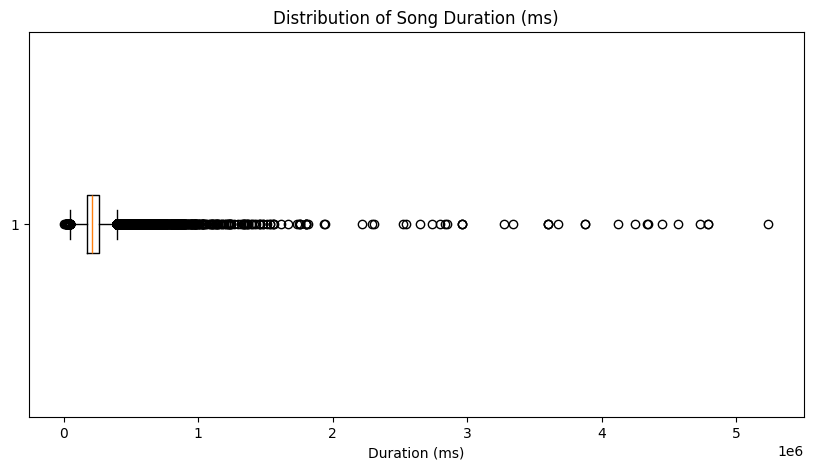

In [456]:
plt.figure(figsize=(10,5))
plt.boxplot(df['duration_ms'], vert=False)
plt.xlabel("Duration (ms)")
plt.title("Distribution of Song Duration (ms)")
plt.show()

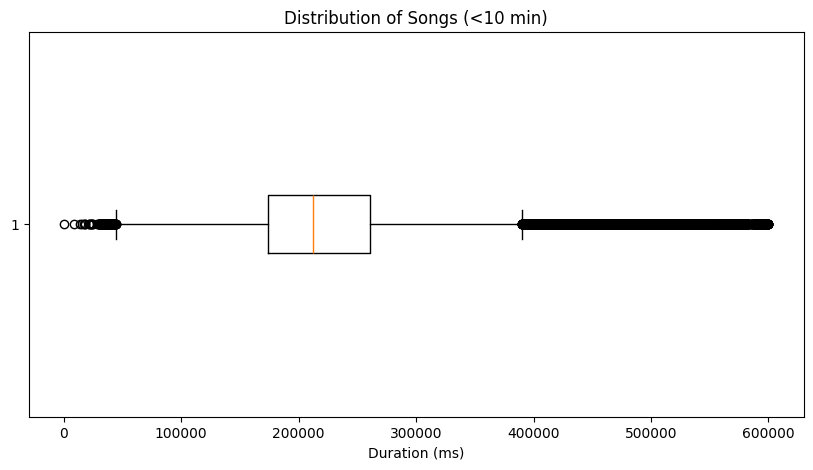

In [457]:
plt.figure(figsize=(10,5))
plt.boxplot(df[df['duration_ms'] < 600000]['duration_ms'], vert=False)
plt.xlabel("Duration (ms)")
plt.title("Distribution of Songs (<10 min)")
plt.show()

In [458]:
bins = range(0, df['duration_ms'].max() + 30000, 30000)
intervals = pd.cut(df['duration_ms'], bins=bins)
frequency = intervals.value_counts().sort_index()

print("Most frequent interval:", frequency.idxmax())
print("Number of songs in that interval:", frequency.max())

Most frequent interval: (180000, 210000]
Number of songs in that interval: 22171


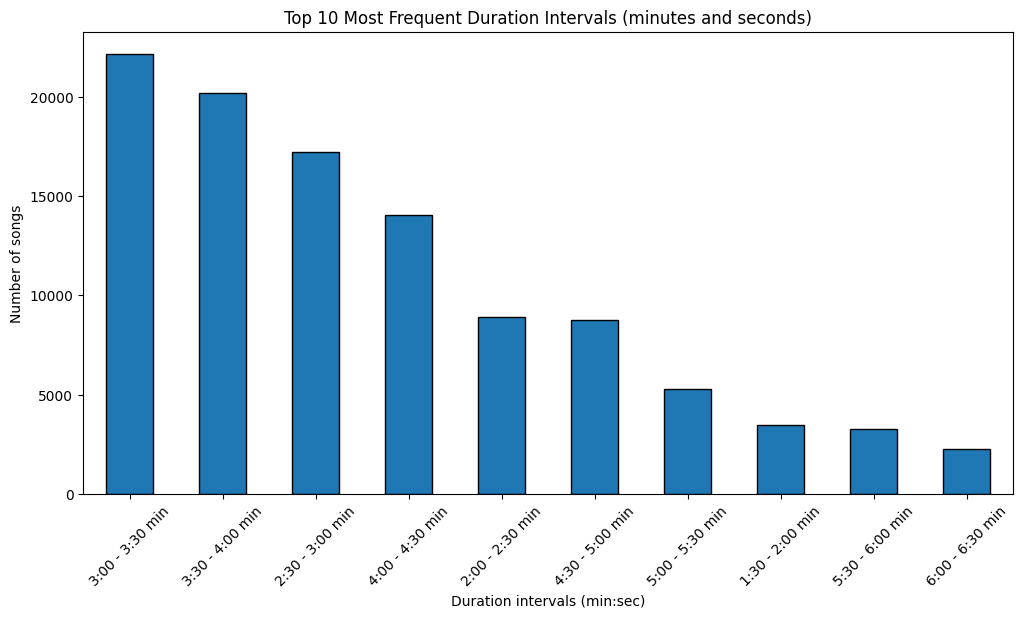

In [459]:
top_intervals = frequency.sort_values(ascending=False).head(10)

def format_interval(x):
    left_min, left_sec = divmod(int(x.left/1000), 60)
    right_min, right_sec = divmod(int(x.right/1000), 60)
    return f"{left_min}:{left_sec:02d} - {right_min}:{right_sec:02d} min"

top_intervals.index = top_intervals.index.map(format_interval)

plt.figure(figsize=(12,6))
top_intervals.plot(kind='bar', edgecolor='black')
plt.xlabel("Duration intervals (min:sec)")
plt.ylabel("Number of songs")
plt.title("Top 10 Most Frequent Duration Intervals (minutes and seconds)")
plt.xticks(rotation=45)
plt.show()

Loudness

In [460]:
loudness_pos = df[df['loudness'] > 0]

print("Number of songs with loudness > 0:", loudness_pos.shape[0])
print(loudness_pos[['track_id', 'track_name', 'artists', 'loudness']].head(10))

Number of songs with loudness > 0: 90
                     track_id                      track_name  \
5307   4KQTgmkSEBzsGS3qL1aX7G                     それは小さな光のような   
5710   7FOeR1X65DEG4KjpVhNC4Z                     それは小さな光のような   
10033  2aRWAz05qiQ9j5HgX7xNHC         Stigma - Burr Oak Remix   
10137  3yqoJ4rc45ep4M0iLa32rC   Ganja - Deekline & Kleu Remix   
10705  5TTJq1w8bLnUHweg924HfI                           STARS   
10907  3InXaDH9pCnoGG8dkwtXUT  Get Lucky - Nick The Lot Remix   
17574  0HfHtjS9S9q4DGVC3uIIRB                      Fate Dance   
17590  4LM77KZM8EgPn9nKk7TdT5           Eternity or Something   
17788  25Ff6JPWUkl786IQeCkcCc                        The Mall   
17886  4nMGtCN3vBJ5MrdPeuUoSP                        Silicone   

                                artists  loudness  
5307                             Sayuri     0.698  
5710                             Sayuri     0.698  
10033                   Noisia;Burr Oak     0.025  
10137         Dub Pistols;Deekline;Kle

In [461]:
loudness_neg40 = df[df['loudness'] < -40]

print("Number of songs with loudness < -40:", loudness_neg40.shape[0])
print(loudness_neg40[['track_id', 'track_name', 'artists', 'loudness']].head(10))

Number of songs with loudness < -40: 38
                     track_id  \
4042   0giZdhbuEYl7uGJaeVuYCz   
4391   4LWvi5lG5IigKIraGUWkpL   
4394   1QooJ7JbyjqXVTDFZKJ4cp   
4952   1b85pN99A6Mn3UU81SYUg0   
16061  0KMayG55Y3QCYK2Yxq7qj7   
16090  7iXBqj42eDlccv9J2qjMnh   
16130  0KMayG55Y3QCYK2Yxq7qj7   
26355  7cDjiRGT0vbQ4XEV1BmEcm   
39086  7iXBqj42eDlccv9J2qjMnh   
39146  0KMayG55Y3QCYK2Yxq7qj7   

                                              track_name  \
4042                           Signals - Remastered 2005   
4391                                               Atoms   
4394                                           Swordfish   
4952                                               Atoms   
16061  Piano Sonata No. 14 in C-Sharp Minor, Op. 27 N...   
16090  The Well-Tempered Clavier, Book I, BWV 846-869...   
16130  Piano Sonata No. 14 in C-Sharp Minor, Op. 27 N...   
26355                                      You Are There   
39086  The Well-Tempered Clavier, Book I, BWV 846-869...

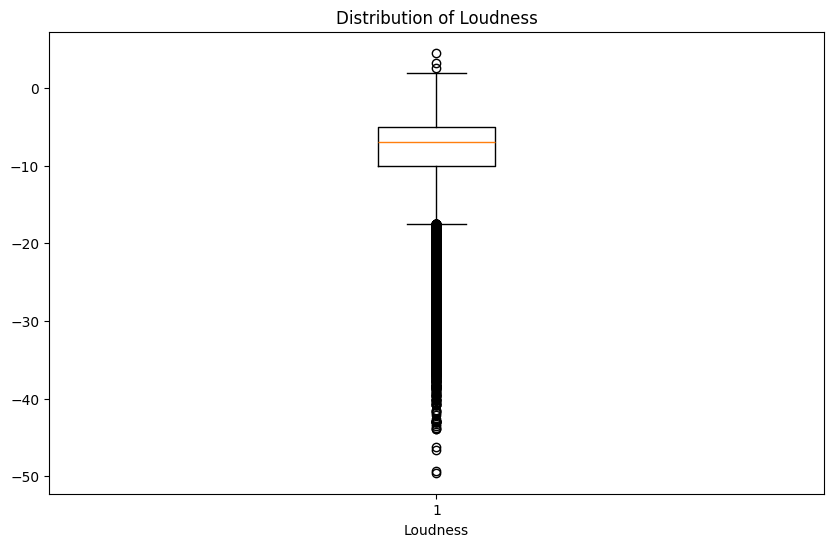

In [462]:
plt.figure(figsize=(10,6))
plt.boxplot(df['loudness'])
plt.xlabel("Loudness")
plt.title("Distribution of Loudness")
plt.show()

Tempo

In [463]:
invalid_tempo = df[df['tempo'] < 40]

print("Number of songs with tempo < 40:", invalid_tempo.shape[0])
print(invalid_tempo[['track_id', 'track_name', 'artists', 'tempo']].head(10))

Number of songs with tempo < 40: 174
                     track_id  \
4131   59gg6zQhSKGVnkT3hWAY3l   
4379   4acmzQsAeMJa5sGFSog7fu   
4664   1Kb2DqjHRvOcT5xeWtz3t5   
4719   1ZUwoCWz8rJqzBTwtdscPN   
5626   0YFvHkxJVGYLioe26UH7xv   
16817  0A5Dar0JoHJSWQ1I4yuxAN   
18417  5S9atrQLWHuMZLvFbDCGUp   
18667  1VFuRe8MpPLQwhYgutEdxd   
45670  6B9Mgf9smWqxDjA35VD6MK   
45720  7i5OoyPXtSrqz9jobJfG1F   

                                              track_name  \
4131                                       The Departure   
4379           The End of Childhood (feat. Jack Liebeck)   
4664                                      Ferme Les Yeux   
4719                                       Leaving Earth   
5626                                   Youseebiggirl/T:t   
16817  12 Variations on ‘La belle Françoise’ in E fla...   
18417                                        Do 'em Good   
18667                                      Cocaine Glenn   
45670                                          Campomoro   

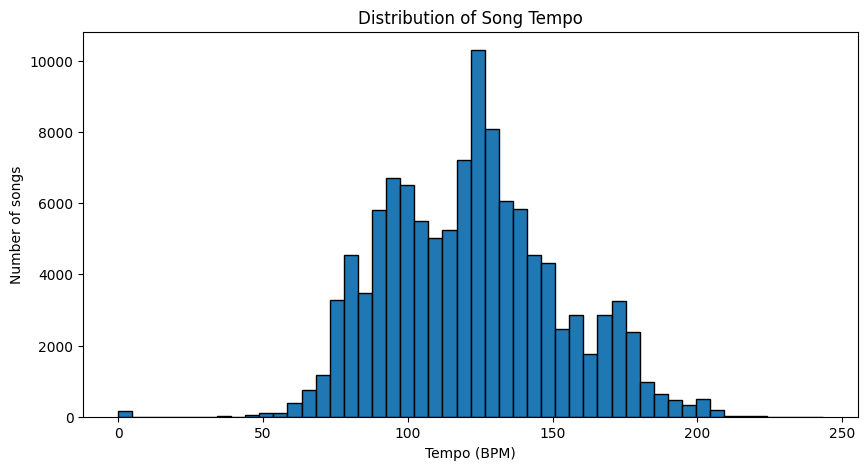

In [464]:
plt.figure(figsize=(10,5))
plt.hist(df['tempo'], bins=50, edgecolor='black')
plt.xlabel("Tempo (BPM)")
plt.ylabel("Number of songs")
plt.title("Distribution of Song Tempo")
plt.show()

Artists, Album and Track name

In [465]:
print("Sample examples from 'artists':")
print(df["artists"].dropna().sample(10, random_state=42))

print("Sample examples from 'album_name':")
print(df["album_name"].dropna().sample(10, random_state=42))

print("Sample examples from 'track_name':")
print(df["track_name"].dropna().sample(10, random_state=42))

Sample examples from 'artists':
113186              Hillsong Worship
42819                   Internal Rot
59311     Zhoobin Askarieh;Ali Sasha
90417                     Billy Fury
61000                     Nogizaka46
96815                   BaianaSystem
18939                     Joe DeRosa
72760                      Cane Hill
25788                           Kano
87169              Charlie Brown Jr.
Name: artists, dtype: object
Sample examples from 'album_name':
113186                                       No Other Name
42819                                       Grieving Birth
59311                                 Noise A Noise 20.4-1
90417                                     A Thousand Stars
61000                                           バレッタ TypeD
96815                                         Duas Cidades
18939                                      You Let Me Down
72760                                    A Form of Protest
25788     I'm Ready (Disco Mix - Original 12 Inch Version)
871

In [466]:
print("Example: Different ways the same artist can be written")
print(df["artists"].str.lower().str.strip().nunique(), "unique values after cleaning")
print(df["artists"].nunique(), "unique values before cleaning")

Example: Different ways the same artist can be written
31428 unique values after cleaning
31437 unique values before cleaning


In [467]:
print("Example: Different ways the same track can be written")
print(df["track_name"].str.lower().str.strip().nunique(), "unique values after cleaning")
print(df["track_name"].nunique(), "unique values before cleaning")

Example: Different ways the same track can be written
72396 unique values after cleaning
73608 unique values before cleaning


In [468]:
print("Example: Different ways the same album can be written")
print(df["album_name"].str.lower().str.strip().nunique(), "unique values after cleaning")
print(df["album_name"].nunique(), "unique values before cleaning")

Example: Different ways the same album can be written
46155 unique values after cleaning
46589 unique values before cleaning


In [469]:
print("Examples of albums with possible duplicates:")
print(df["album_name"].str.lower().str.strip().value_counts().head(20))

Examples of albums with possible duplicates:
album_name
alternative christmas 2022              195
feliz cumpleaños con perreo             184
metal                                   143
halloween con perreito                  123
halloween party 2022                    115
the complete hank williams              111
fiesta portatil                         110
frescura y perreo                       106
esto me suena a farra                   105
perreo en halloween                     103
on air 70's hits                        102
queda poco para la paes 2.0             101
reggeaton imperdible                     98
halloween metal nights                   95
homecoming latin party                   95
el perreo es el futuro                   94
arbeitsmusik herbst/winter 2022/2023     93
greatest hits                            93
hans zimmer: epic scores                 91
edm gaming music autumn/winter 2022      90
Name: count, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

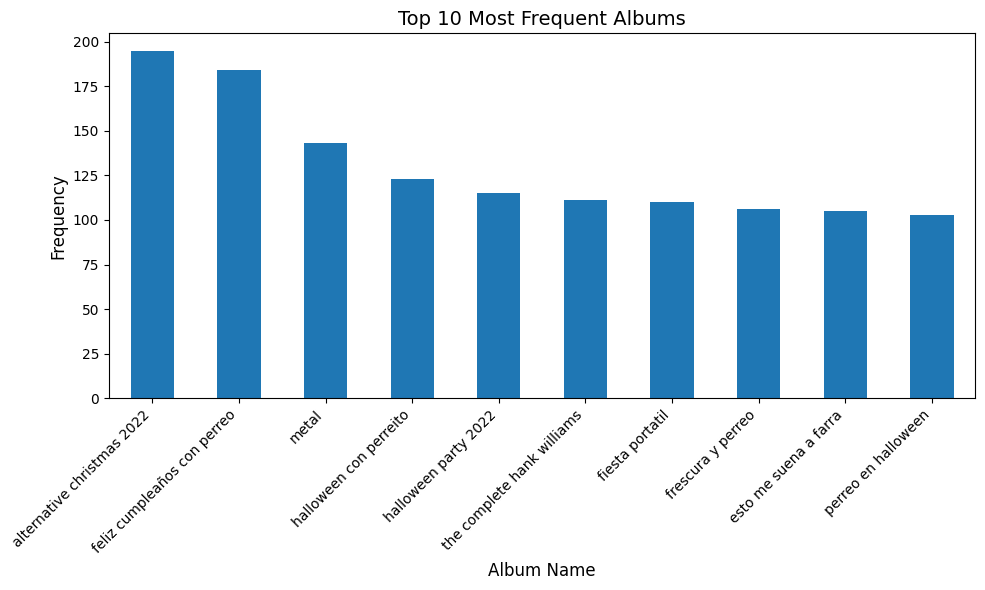

In [470]:
top_albums = df["album_name"].str.lower().str.strip().value_counts().head(10)
plt.figure(figsize=(10,6))
top_albums.plot(kind="bar")

plt.title("Top 10 Most Frequent Albums", fontsize=14)
plt.xlabel("Album Name", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show

Time signature

In [471]:
invalid_time_signature = df[df['time_signature'] == 0]

print("Number of songs with time_signature = 0:", invalid_time_signature.shape[0])
print(invalid_time_signature.head(10))

Number of songs with time_signature = 0: 163
       Unnamed: 0                track_id  \
2926         2926  0jdfbvSdaWvxfAlD20TtNc   
4131         4131  59gg6zQhSKGVnkT3hWAY3l   
4379         4379  4acmzQsAeMJa5sGFSog7fu   
4664         4664  1Kb2DqjHRvOcT5xeWtz3t5   
26910       26910  7HSc2wpHlXKIl8SCZK7zsP   
45670       45670  6B9Mgf9smWqxDjA35VD6MK   
45720       45720  7i5OoyPXtSrqz9jobJfG1F   
45729       45729  0pTAEdockvKVSq1hhFqk7O   
45773       45773  1keWmyG6qyBbMagPBdgUKr   
59221       59221  5BcyxCXrXuw4vsAqAiObWM   

                                                artists  \
2926                                         Yaşlı Amca   
4131                              Max Richter;Lang Lang   
4379   Dario Marianelli;Jack Liebeck;Benjamin Wallfisch   
4664                                   Sylvain Chauveau   
26910                                      Benny Martin   
45670                                   Little Symphony   
45720                                   Little

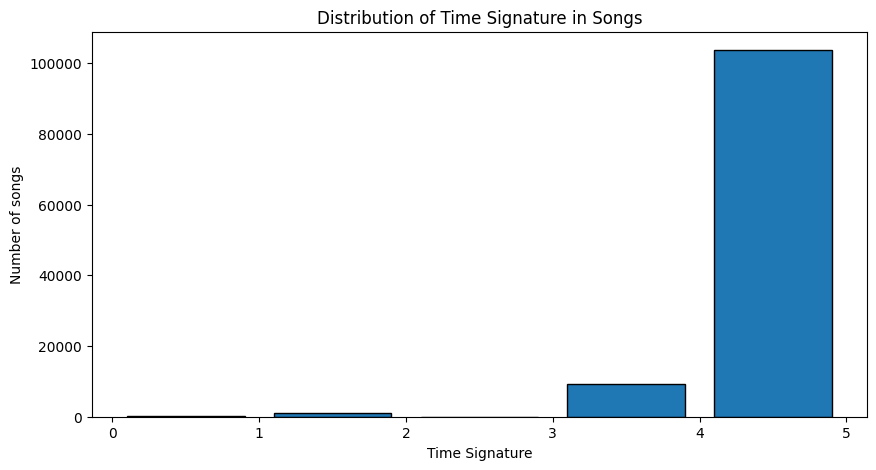

In [472]:
plt.figure(figsize=(10,5))
plt.hist(df['time_signature'], bins=df['time_signature'].nunique(), edgecolor='black', rwidth=0.8)
plt.xlabel("Time Signature")
plt.ylabel("Number of songs")
plt.title("Distribution of Time Signature in Songs")
plt.show()

In [473]:
invalid_songs = df[
    (df['tempo'] == 0) &
    (df['time_signature'] == 0)]

print("Number of songs with invalid characteristics:", invalid_songs.shape[0])
print(invalid_songs.head(10))


Number of songs with invalid characteristics: 157
       Unnamed: 0                track_id  \
4131         4131  59gg6zQhSKGVnkT3hWAY3l   
4379         4379  4acmzQsAeMJa5sGFSog7fu   
4664         4664  1Kb2DqjHRvOcT5xeWtz3t5   
45670       45670  6B9Mgf9smWqxDjA35VD6MK   
45720       45720  7i5OoyPXtSrqz9jobJfG1F   
45729       45729  0pTAEdockvKVSq1hhFqk7O   
45773       45773  1keWmyG6qyBbMagPBdgUKr   
59221       59221  5BcyxCXrXuw4vsAqAiObWM   
59310       59310  6hsyfegVY5yklJneM40mWi   
59473       59473  48Nt8u7kYSTwE6axtE9hJO   

                                                artists  \
4131                              Max Richter;Lang Lang   
4379   Dario Marianelli;Jack Liebeck;Benjamin Wallfisch   
4664                                   Sylvain Chauveau   
45670                                   Little Symphony   
45720                                   Little Symphony   
45729                                   Little Symphony   
45773                                   L

In [474]:
invalid_songs = df[
    (df['tempo'] == 0) & 
    (df['time_signature'] == 0)
].copy()

valid_songs = df[
    ~((df['tempo'] == 0) & (df['time_signature'] == 0))
].copy()

features = ['danceability', 'energy', 'speechiness', 
            'acousticness', 'instrumentalness', 'liveness', 'valence']

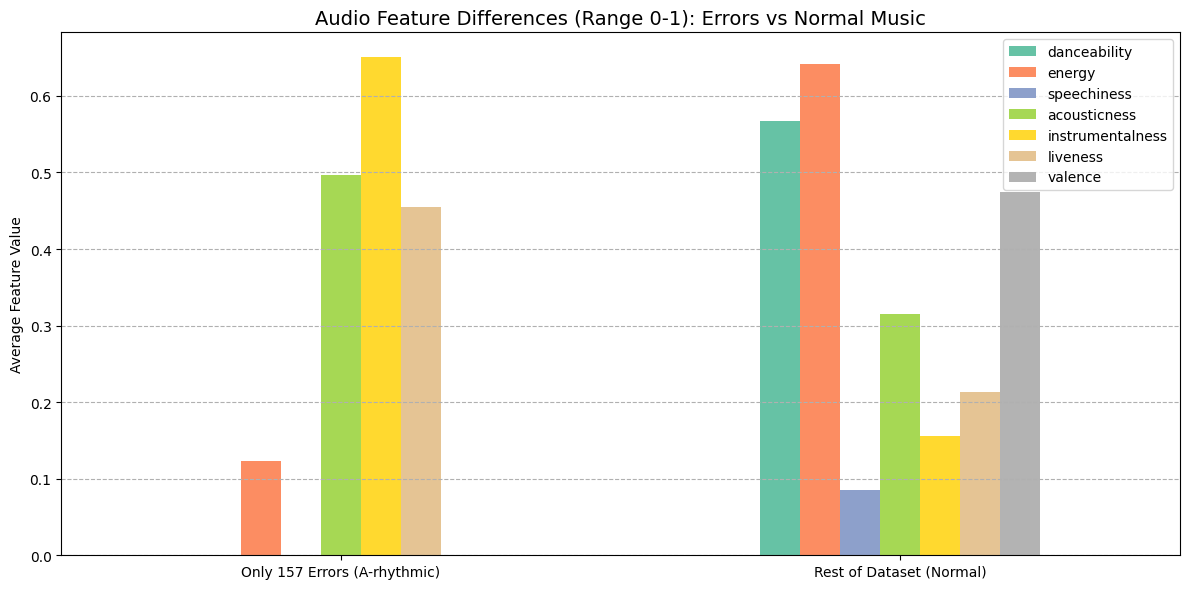

In [475]:
mean_invalid = invalid_songs[features].mean()
mean_valid = valid_songs[features].mean()

comparison_df_clean = pd.DataFrame({
    'Only 157 Errors (A-rhythmic)': mean_invalid,
    'Rest of Dataset (Normal)': mean_valid
})

comparison_df_clean.T.plot(
    kind='bar', 
    figsize=(12, 6), 
    rot=0, 
    colormap='Set2' 
)
plt.title('Audio Feature Differences (Range 0-1): Errors vs Normal Music', fontsize=14)
plt.ylabel('Average Feature Value')
plt.legend(loc='upper right')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

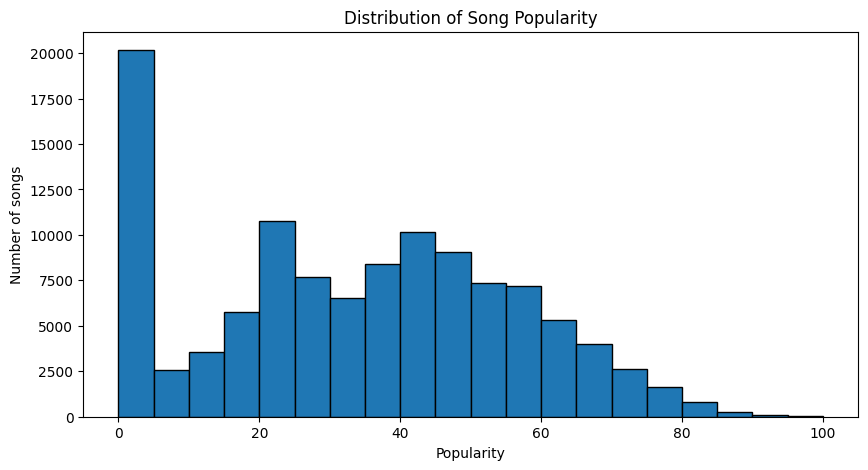

In [476]:
plt.figure(figsize=(10,5))
plt.hist(df['popularity'], bins=20, edgecolor='black')
plt.xlabel("Popularity")
plt.ylabel("Number of songs")
plt.title("Distribution of Song Popularity")
plt.show()

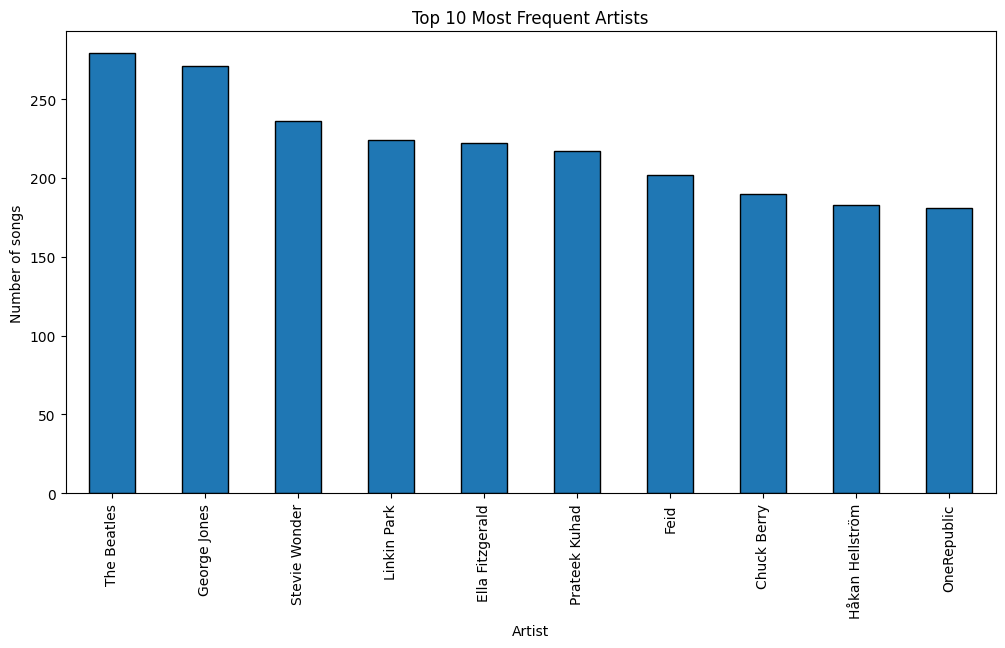

In [477]:
df['artists'].value_counts().head(10).plot(kind='bar', figsize=(12,6), edgecolor='black')
plt.xlabel("Artist")
plt.ylabel("Number of songs")
plt.title("Top 10 Most Frequent Artists")
plt.show()

In [478]:
genres_list = df['track_genre'].unique().tolist()
print(genres_list)

['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient', 'anime', 'black-metal', 'bluegrass', 'blues', 'brazil', 'breakbeat', 'british', 'cantopop', 'chicago-house', 'children', 'chill', 'classical', 'club', 'comedy', 'country', 'dance', 'dancehall', 'death-metal', 'deep-house', 'detroit-techno', 'disco', 'disney', 'drum-and-bass', 'dub', 'dubstep', 'edm', 'electro', 'electronic', 'emo', 'folk', 'forro', 'french', 'funk', 'garage', 'german', 'gospel', 'goth', 'grindcore', 'groove', 'grunge', 'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle', 'heavy-metal', 'hip-hop', 'honky-tonk', 'house', 'idm', 'indian', 'indie-pop', 'indie', 'industrial', 'iranian', 'j-dance', 'j-idol', 'j-pop', 'j-rock', 'jazz', 'k-pop', 'kids', 'latin', 'latino', 'malay', 'mandopop', 'metal', 'metalcore', 'minimal-techno', 'mpb', 'new-age', 'opera', 'pagode', 'party', 'piano', 'pop-film', 'pop', 'power-pop', 'progressive-house', 'psych-rock', 'punk-rock', 'punk', 'r-n-b', 'reggae', 'reggaeton', 'rock-n

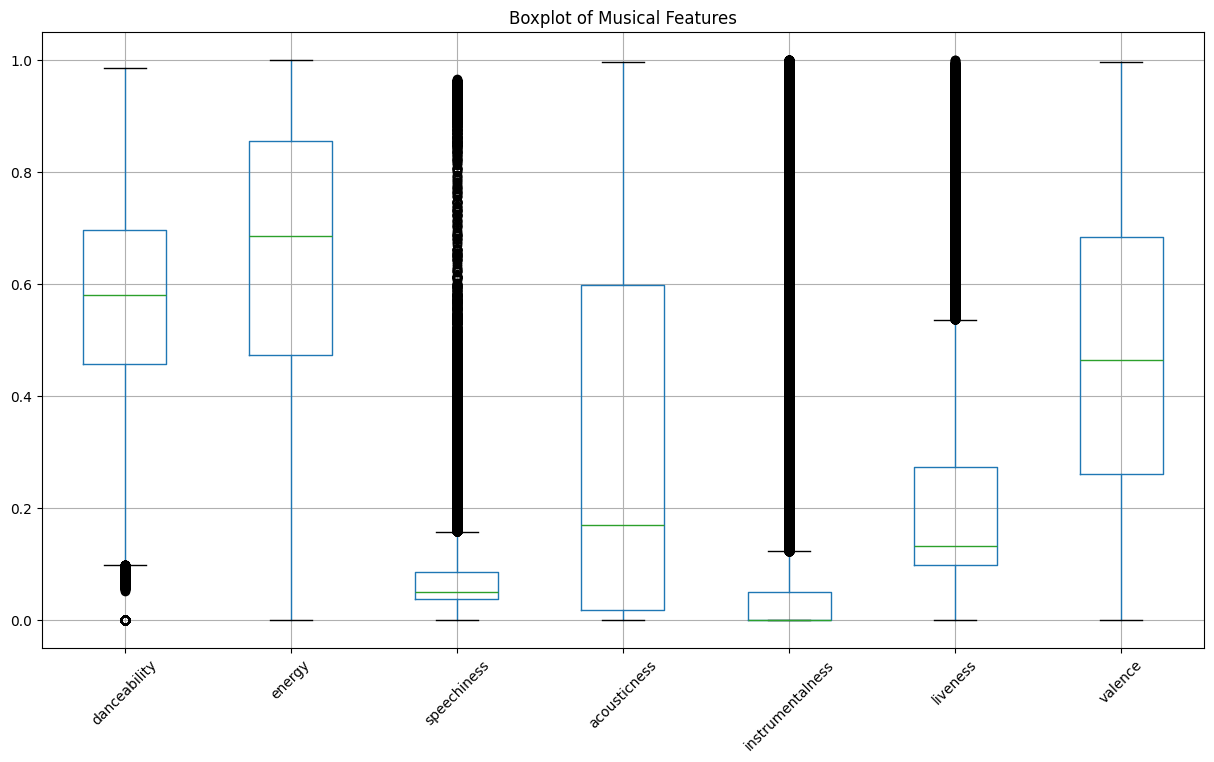

In [479]:
features = ['danceability','energy','speechiness','acousticness','instrumentalness','liveness','valence']
plt.figure(figsize=(15,8))
df[features].boxplot(rot=45)
plt.title("Boxplot of Musical Features")
plt.show()

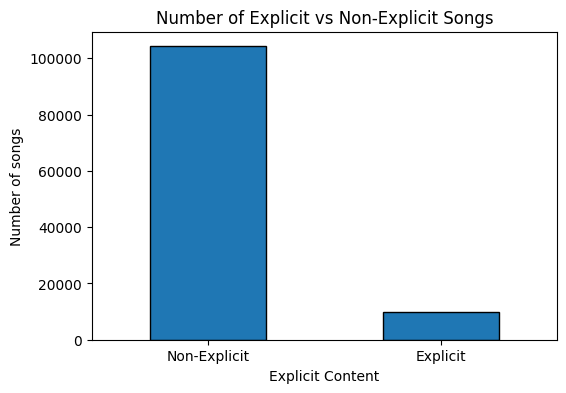

In [480]:
explicit_counts = df['explicit'].value_counts()

plt.figure(figsize=(6,4))
explicit_counts.plot(kind='bar', edgecolor='black')
plt.xlabel("Explicit Content")
plt.ylabel("Number of songs")
plt.title("Number of Explicit vs Non-Explicit Songs")
plt.xticks(ticks=[0,1], labels=['Non-Explicit','Explicit'], rotation=0)
plt.show()

## **Grammy Awards**

In [481]:
df1 = pd.read_csv("data/the_grammy_awards.csv")

General info

In [482]:
df1.shape

(4810, 10)

In [483]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4810 entries, 0 to 4809
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   year          4810 non-null   int64 
 1   title         4810 non-null   object
 2   published_at  4810 non-null   object
 3   updated_at    4810 non-null   object
 4   category      4810 non-null   object
 5   nominee       4804 non-null   object
 6   artist        2970 non-null   object
 7   workers       2620 non-null   object
 8   img           3443 non-null   object
 9   winner        4810 non-null   bool  
dtypes: bool(1), int64(1), object(8)
memory usage: 343.0+ KB


In [484]:
df1.isna().sum()

year               0
title              0
published_at       0
updated_at         0
category           0
nominee            6
artist          1840
workers         2190
img             1367
winner             0
dtype: int64

In [485]:
df1.duplicated().sum()

np.int64(0)

In [486]:
df1.describe()

,year
count,4810.000000
mean,1995.566944
std,17.149720
min,1958.000000
25%,1983.000000
50%,1998.000000
75%,2010.000000
max,2019.000000


In [487]:
df1.describe(include='object')

,title,published_at,updated_at,category,nominee,artist,workers,img
count,4810,4810,4810,4810,4804,2970,2620,3443
unique,62,4,10,638,4131,1658,2366,1463
top,62nd Annual GRAMMY Awards (2019),2017-11-28T00:03:45-08:00,2019-09-10T01:08:19-07:00,Song Of The Year,Berlioz: Requiem,(Various Artists),"John Williams, composer (John Williams)",https://www.grammy.com/sites/com/files/styles/...
freq,433,4205,778,70,7,66,20,26


In [488]:
num_duplicates = df1.duplicated().sum()
print(f"Number of completely duplicated rows: {num_duplicates}")

Number of completely duplicated rows: 0


C:\Users\maria\AppData\Local\Temp\ipykernel_35208\3834659629.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  nominations_per_range = df1.groupby(pd.cut(df1['year'], bins=bins, labels=labels, right=True))['year'].count()
C:\Users\maria\AppData\Local\Temp\ipykernel_35208\3834659629.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=nominations_per_range.index, y=nominations_per_range.values, palette='Set2')


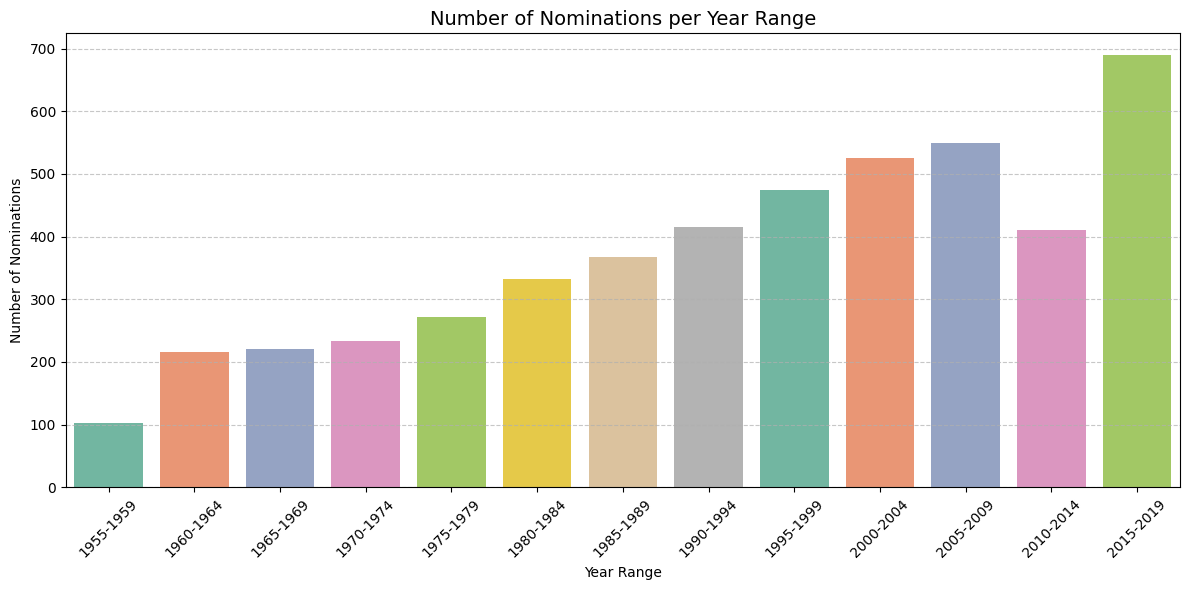

In [489]:
bins = np.arange(1955, 2025, 5)
labels = [f"{i}-{i+4}" for i in bins[:-1]]

nominations_per_range = df1.groupby(pd.cut(df1['year'], bins=bins, labels=labels, right=True))['year'].count()

plt.figure(figsize=(12,6))
sns.barplot(x=nominations_per_range.index, y=nominations_per_range.values, palette='Set2')
plt.title("Number of Nominations per Year Range", fontsize=14)
plt.xlabel("Year Range")
plt.ylabel("Number of Nominations")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Category

C:\Users\maria\AppData\Local\Temp\ipykernel_35208\4148232847.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, palette='Set3')


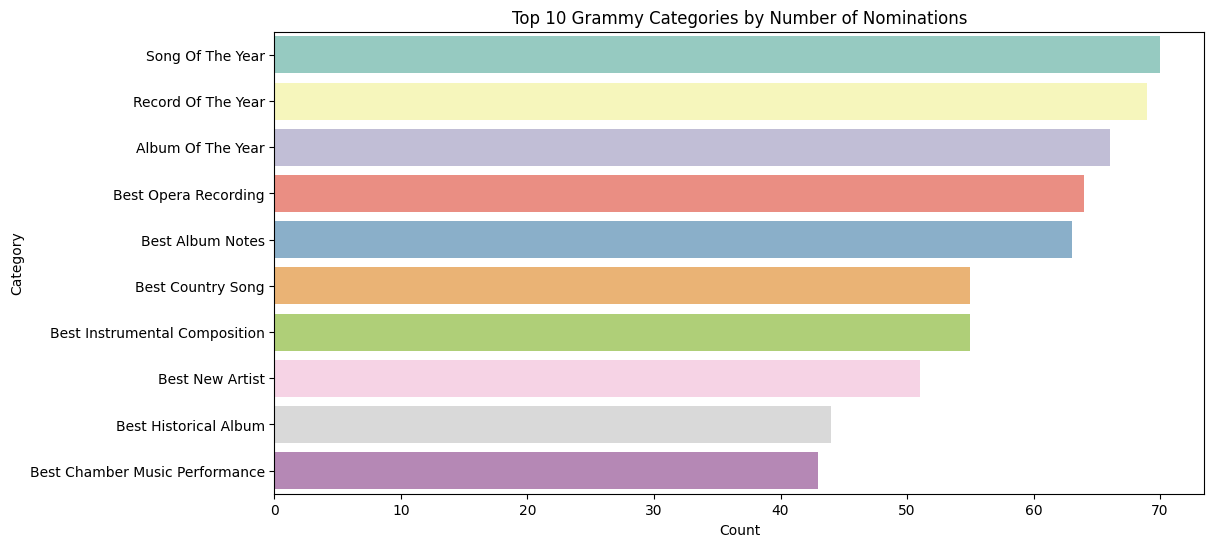

In [490]:
plt.figure(figsize=(12,6))
top_categories = df1['category'].value_counts().nlargest(10)
sns.barplot(x=top_categories.values, y=top_categories.index, palette='Set3')
plt.title("Top 10 Grammy Categories by Number of Nominations")
plt.xlabel("Count")
plt.ylabel("Category")
plt.show()

In [491]:
categories_count = df1['category'].value_counts()
print(categories_count)

category
Song Of The Year                                                                          70
Record Of The Year                                                                        69
Album Of The Year                                                                         66
Best Opera Recording                                                                      64
Best Album Notes                                                                          63
                                                                                          ..
Best Sound Track Album, Dramatic Picture Score Or Original Cast                            1
Best Performance, Documentary Or Spoken Word                                               1
Best Classical Performance - Instrumentalist (With Concerto Scale Accompaniment)           1
Best Classical Performance - Instrumentalist (Other Than Concerto-Scale Accompaniment)     1
Best Classical Performance - Operatic Or Choral              

In [492]:
print("Unique categories in Grammys:")
print(df1["category"].unique())

print("Distribution of nominations by category:")
print(df1["category"].value_counts())

Unique categories in Grammys:
['Record Of The Year' 'Album Of The Year' 'Song Of The Year'
 'Best New Artist' 'Best Pop Solo Performance'
 'Best Pop Duo/Group Performance' 'Best Traditional Pop Vocal Album'
 'Best Pop Vocal Album' 'Best Dance Recording'
 'Best Dance/Electronic Album' 'Best Contemporary Instrumental Album'
 'Best Rock Performance' 'Best Metal Performance' 'Best Rock Song'
 'Best Rock Album' 'Best Alternative Music Album' 'Best R&B Performance'
 'Best Traditional R&B Performance' 'Best R&B Song'
 'Best Urban Contemporary Album' 'Best R&B Album' 'Best Rap Performance'
 'Best Rap/Sung Performance' 'Best Rap Song' 'Best Rap Album'
 'Best Country Solo Performance' 'Best Country Duo/Group Performance'
 'Best Country Song' 'Best Country Album' 'Best New Age Album'
 'Best Improvised Jazz Solo' 'Best Jazz Vocal Album'
 'Best Jazz Instrumental Album' 'Best Large Jazz Ensemble Album'
 'Best Latin Jazz Album' 'Best Gospel Performance/Song'
 'Best Contemporary Christian Music Perfor

In [493]:
categories_lower = df1['category'].str.lower()
unique_lower = categories_lower.nunique()
unique_original = df1['category'].nunique()
print(f"Unique categories before lowercasing: {unique_original}")
print(f"Unique categories after lowercasing: {unique_lower}")

Unique categories before lowercasing: 638
Unique categories after lowercasing: 630


In [494]:
nominee_lower = df1['nominee'].dropna().str.lower().str.strip()
unique_nominee_original = df1['nominee'].nunique()
unique_nominee_lower = nominee_lower.nunique()

print(f"Unique nominees before lowercasing: {unique_nominee_original}")
print(f"Unique nominees after lowercasing: {unique_nominee_lower}")

Unique nominees before lowercasing: 4131
Unique nominees after lowercasing: 4131


In [495]:
top_nominees = df1['nominee'].value_counts().head(10)
print("\nTop 10 nominees:")
print(top_nominees)


Top 10 nominees:
nominee
Berlioz: Requiem              7
Steven Epstein                7
Robert Woods                  7
Bridge Over Troubled Water    7
Britten: War Requiem          6
David Frost                   6
A Taste Of Honey              6
Up, Up And Away               6
Blackstar                     5
West Side Story               5
Name: count, dtype: int64


In [496]:
artist_lower = df1['artist'].dropna().str.lower().str.strip()
unique_artist_original = df1['artist'].nunique()
unique_artist_lower = artist_lower.nunique()

print(f"Unique artists before lowercasing: {unique_artist_original}")
print(f"Unique artists after lowercasing: {unique_artist_lower}")

Unique artists before lowercasing: 1658
Unique artists after lowercasing: 1656


In [497]:
print(df1["artist"].sample(20).tolist())

[nan, 'Kendrick Lamar', 'Sarah Jarosz', 'Jimmy Cliff', 'Pepe Aguilar', 'Fugees', nan, nan, 'Arturo Sandoval', 'Weather Report', '(The Muppets, Glen Campbell, Crystal Gayle, Loretta Lynn, Tanya Tucker)', nan, 'Aretha Franklin', 'Gnarls Barkley', 'Erykah Badu', 'Elton John', nan, 'Poncho Sanchez', 'Little Joe & La Familia', 'Esperanza Spalding']


In [498]:
df1["artist"].value_counts().head(30)

artist
(Various Artists)                66
U2                               18
Aretha Franklin                  16
Stevie Wonder                    13
Ella Fitzgerald                  13
Beyoncé                          13
Bruce Springsteen                13
Jimmy Sturr                      12
Dixie Chicks                     12
Ray Charles                      12
Tony Bennett                     12
Adele                            11
B.B. King                        11
Eminem                           11
Vince Gill                       10
Pat Metheny Group                10
Eric Clapton                     10
Foo Fighters                     10
Michael Jackson                   9
Bob Dylan                         9
Shirley Caesar                    9
Alison Krauss & Union Station     9
CeCe Winans                       9
Bill Cosby                        8
Sting                             8
The Manhattan Transfer            8
Roger Miller                      8
Duke Ellington       

In [499]:
print(df1[df1["artist"].str.contains("&", na=False)]["artist"].head(20))

print(df1[df1["artist"].str.contains(",", na=False)]["artist"].head(20))

print(df1[df1["artist"].str.contains("feat", case=False, na=False)]["artist"].head(20))

print(df1[df1["artist"].str.contains(" and ", case=False, na=False)]["artist"].head(20))

7                                 Post Malone & Swae Lee
38                          Ariana Grande & Social House
40                                Post Malone & Swae Lee
41                         Shawn Mendes & Camila Cabello
42                        Elvis Costello & The Imposters
56                  Skrillex, Boys Noize & Ty Dolla $ign
70                                Karen O & Danger Mouse
93                                Daniel Caesar & Brandy
117        Nipsey Hussle Featuring Roddy Ricch & Hit-Boy
120    Dreamville Featuring J.I.D, Bas, J. Cole, EART...
122      DJ Khaled Featuring Nipsey Hussle & John Legend
123                                     Lil Baby & Gunna
126          Young Thug Featuring J. Cole & Travis Scott
143                        Brooks & Dunn With Luke Combs
180             Mike Holober & The Gotham Jazz Orchestra
182                 Chick Corea & The Spanish Heart Band
183    Thalma de Freitas With Vitor Gonçalves, John P...
202                            

In [500]:
patterns = {
    "&": df1["artist"].str.contains("&", na=False).sum(),
    ",": df1["artist"].str.contains(",", na=False).sum(),
    "feat": df1["artist"].str.contains("feat", case=False, na=False).sum(),
    "featuring": df1["artist"].str.contains("featuring", case=False, na=False).sum(),
    " and ": df1["artist"].str.contains(" and ", case=False, na=False).sum()
}

print(patterns)

{'&': np.int64(415), ',': np.int64(124), 'feat': np.int64(87), 'featuring': np.int64(87), ' and ': np.int64(60)}


C:\Users\maria\AppData\Local\Temp\ipykernel_35208\3534315230.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_artists.values, y=top_artists.index, palette='Set2')


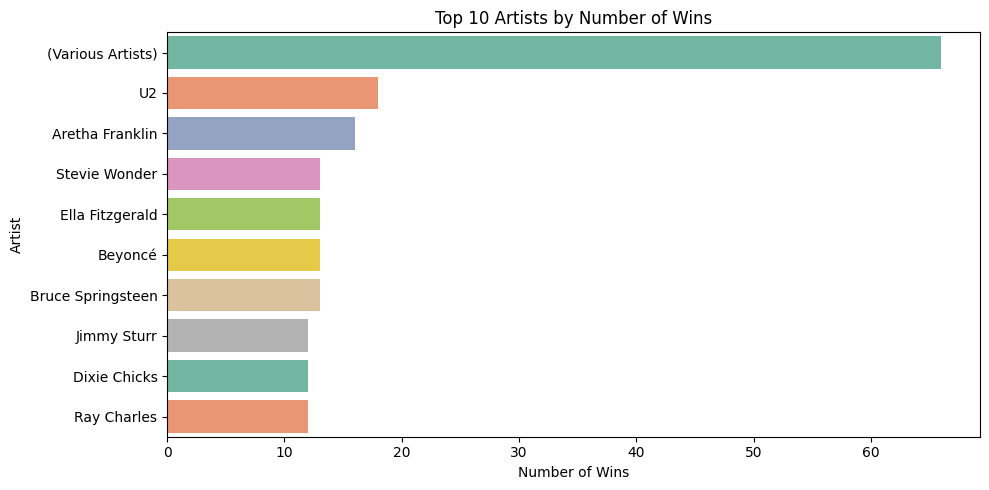

In [501]:
top_artists = df1['artist'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_artists.values, y=top_artists.index, palette='Set2')
plt.title("Top 10 Artists by Number of Wins")
plt.xlabel("Number of Wins")
plt.ylabel("Artist")
plt.tight_layout()
plt.show()


In [502]:
title_lower = df1['title'].dropna().str.lower().str.strip()
unique_title_original = df1['title'].nunique()
unique_title_lower = title_lower.nunique()

print(f"Unique titles before lowercasing: {unique_title_original}")
print(f"Unique titles after lowercasing: {unique_title_lower}")

Unique titles before lowercasing: 62
Unique titles after lowercasing: 62


In [503]:
print(df1['title'].value_counts())
print("Total unique titles:", df1['title'].nunique())

title
62nd Annual GRAMMY Awards  (2019)    433
50th Annual GRAMMY Awards  (2007)    111
51st Annual GRAMMY Awards  (2008)    111
49th Annual GRAMMY Awards  (2006)    110
53rd Annual GRAMMY Awards  (2010)    109
                                    ... 
11th Annual GRAMMY Awards  (1968)     40
5th Annual GRAMMY Awards  (1962)      39
3rd Annual GRAMMY Awards  (1960)      39
2nd Annual GRAMMY Awards  (1959)      35
1st Annual GRAMMY Awards  (1958)      28
Name: count, Length: 62, dtype: int64
Total unique titles: 62


C:\Users\maria\AppData\Local\Temp\ipykernel_35208\1386372852.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='winner', y='title', data=last_15_years, palette='Set2')


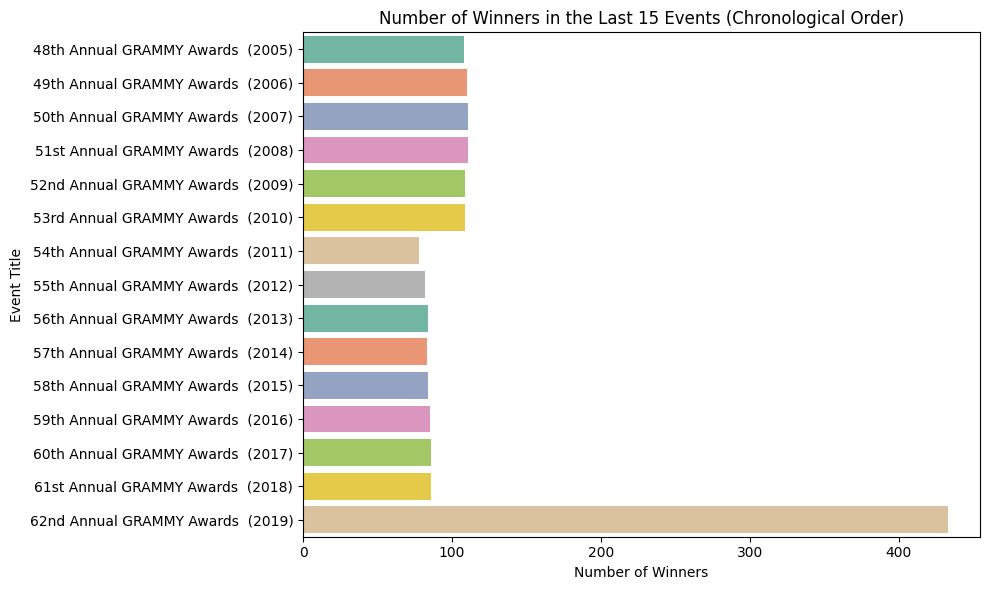

In [504]:
winners_per_event = df1.groupby(['year', 'title'])['winner'].count().reset_index()

last_15_years = winners_per_event.sort_values('year', ascending=True).tail(15)

plt.figure(figsize=(10,6))
sns.barplot(x='winner', y='title', data=last_15_years, palette='Set2')
plt.title("Number of Winners in the Last 15 Events (Chronological Order)")
plt.xlabel("Number of Winners")
plt.ylabel("Event Title")
plt.tight_layout()
plt.show()

In [505]:
print(df1['published_at'].value_counts().head(10))
print("Total unique values in published_at:", df1['published_at'].nunique())

print(df1['updated_at'].value_counts().head(10))
print("Total unique values in updated_at:", df1['updated_at'].nunique())

published_at
2017-11-28T00:03:45-08:00    4205
2020-05-19T05:10:28-07:00     433
2018-12-06T23:48:49-08:00      86
2018-05-22T03:08:24-07:00      86
Name: count, dtype: int64
Total unique values in published_at: 4
updated_at
2019-09-10T01:08:19-07:00    778
2019-09-10T01:06:11-07:00    754
2019-09-10T01:07:37-07:00    713
2019-09-10T01:06:59-07:00    681
2019-09-10T01:11:09-07:00    658
2019-09-10T01:09:02-07:00    554
2020-05-19T05:10:28-07:00    433
2017-11-28T00:03:45-08:00    108
2020-09-01T12:16:40-07:00     83
2019-09-10T01:11:48-07:00     48
Name: count, dtype: int64
Total unique values in updated_at: 10


In [506]:
duplicate_rows = df1[df1.duplicated(keep=False)]
print(f"Number of fully duplicated rows: {duplicate_rows.shape[0]}")

if not duplicate_rows.empty:
    print("\nExample duplicated rows:")
    print(duplicate_rows.head(10))
else:
    print("No fully duplicated rows found.")

Number of fully duplicated rows: 0
No fully duplicated rows found.


In [507]:
df1[df1["nominee"].str.lower() == "bad guy"]

,year,title,published_at,updated_at,category,nominee,artist,workers,img,winner
0,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,Bad Guy,Billie Eilish,"Finneas O'Connell, producer; Rob Kinelski & Fi...",https://www.grammy.com/sites/com/files/styles/...,True
16,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Song Of The Year,Bad Guy,NaN,"Billie Eilish O'Connell & Finneas O'Connell, s...",https://www.grammy.com/sites/com/files/styles/...,True
34,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best Pop Solo Performance,Bad Guy,Billie Eilish,NaN,https://www.grammy.com/sites/com/files/styles/...,True


In [508]:
df[df["track_name"].str.lower() == "bad guy"].shape[0]

15

In [509]:
df[df["track_name"].str.lower() == "bad guy"]

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
14928,14928,1IWuiJ7X8zaPmK9NiL0lH6,Twinkle Twinkle Little Rock Star,Lullaby Versions of Billie Eilish,bad guy,28,266571,False,0.725,0.0524,...,-30.335,0,0.1020,0.97900,0.9350,0.0943,0.185,140.028,5,children
31018,31018,2Fxmhks0bxGSBdJ92vM42m,Billie Eilish,"WHEN WE ALL FALL ASLEEP, WHERE DO WE GO?",bad guy,84,194087,False,0.701,0.4250,...,-10.965,1,0.3750,0.32800,0.1300,0.1000,0.562,135.128,4,electro
31033,31033,5KJaEu2ZMIt9FMvofqUgmg,Billie Eilish,Отново на училище,bad guy,1,194087,False,0.701,0.4250,...,-10.965,1,0.3750,0.32800,0.1300,0.1000,0.562,135.128,4,electro
31040,31040,154lbtHSyyOt0ao2QwbE4n,Billie Eilish,Girls Night,bad guy,1,194087,False,0.701,0.4250,...,-10.965,1,0.3750,0.32800,0.1300,0.1000,0.562,135.128,4,electro
31044,31044,2yNKDG4FgwzQuL0JUEOunR,Billie Eilish,Herbststimmung,bad guy,1,194087,False,0.701,0.4250,...,-10.965,1,0.3750,0.32800,0.1300,0.1000,0.562,135.128,4,electro
31046,31046,6DBdYfd4EkR6cUPSqtEwhQ,Billie Eilish,Beginner Ride (Sweat & Burn),bad guy,2,194087,False,0.701,0.4250,...,-10.965,1,0.3750,0.32800,0.1300,0.1000,0.562,135.128,4,electro
31047,31047,4Vzpf1TmxKmczOiTAfheBs,Billie Eilish,Halloween 2022,bad guy,0,194087,False,0.701,0.4250,...,-10.965,1,0.3750,0.32800,0.1300,0.1000,0.562,135.128,4,electro
31049,31049,1c8h1SBYY44ys4EuaIZJMn,Billie Eilish,Halloween Party 2022,bad guy,0,194087,False,0.701,0.4250,...,-10.965,1,0.3750,0.32800,0.1300,0.1000,0.562,135.128,4,electro
81526,81526,5KJaEu2ZMIt9FMvofqUgmg,Billie Eilish,Отново на училище,bad guy,1,194087,False,0.701,0.4250,...,-10.965,1,0.3750,0.32800,0.1300,0.1000,0.562,135.128,4,pop
81533,81533,154lbtHSyyOt0ao2QwbE4n,Billie Eilish,Girls Night,bad guy,1,194087,False,0.701,0.4250,...,-10.965,1,0.3750,0.32800,0.1300,0.1000,0.562,135.128,4,pop


In [510]:
df1[df1["nominee"].str.lower() == "bad guy"][["nominee", "artist", "year", "category"]]

,nominee,artist,year,category
0,Bad Guy,Billie Eilish,2019,Record Of The Year
16,Bad Guy,NaN,2019,Song Of The Year
34,Bad Guy,Billie Eilish,2019,Best Pop Solo Performance


In [511]:
df1['nominee'].value_counts().head(40)

nominee
Berlioz: Requiem                                 7
Steven Epstein                                   7
Robert Woods                                     7
Bridge Over Troubled Water                       7
Britten: War Requiem                             6
David Frost                                      6
A Taste Of Honey                                 6
Up, Up And Away                                  6
Blackstar                                        5
West Side Story                                  5
Gentle On My Mind                                5
Berlioz: Les Troyens                             5
Berg: Wozzeck                                    5
Need You Now                                     5
Judith Sherman                                   5
Mahler: Symphony No. 9 In D                      5
King Of The Road                                 5
Brothers                                         4
24K Magic                                        4
This Is America        

In [512]:
winner_counts = df1['winner'].value_counts()
print("Winner counts:")
print(winner_counts)

Winner counts:
winner
True    4810
Name: count, dtype: int64


DF FULL

In [528]:
path = "data/merged_spotify_grammys.csv"
df_full = pd.read_csv(path)
print("Shape:", df_full.shape)
df_full.head()


Shape: (85693, 25)


,track_id,track_name,artist_spotify,album_name,album_others,popularity,duration_min,explicit,danceability,energy,...,valence,tempo,main_genre,sub_genre,year,title,category,nominee,artist_grammy,grammy_nominee
0,0fROT4kK5oTm8xO8PX6EJF,!i'll be back!,rilès,!i'll be back!,not specified,52.0,2.975550,True,0.823,0.6120,...,0.6880,142.959,world,french,0.0,not specified,not specified,not specified,not specified,False
1,1hH0t381PIXmUVWyG1Vj3p,"""a"" you're adorable",brian hyland,the bashful blond,not specified,39.0,2.528000,False,0.615,0.3750,...,0.9220,110.720,rock,rockabilly,0.0,not specified,not specified,not specified,not specified,False
2,1B45DvGMoFWdbAEUH2qliG,"""c"" is for cookie",little apple band,the favorite songs of sesame street,sesame street and friends,32.0,1.405083,False,0.553,0.8120,...,0.8710,118.368,children,not specified,0.0,not specified,not specified,not specified,not specified,False
3,0jmz4aHEIBCRgrcV2xEkwB,"""christe, redemptor omnium""",traditional;sistine chapel choir;massimo palom...,classical christmas,not specified,0.0,4.818883,False,0.111,0.0568,...,0.0395,169.401,study,sleep,0.0,not specified,not specified,not specified,not specified,False
4,5Zx0Rrkn5RFBMD2PRxX3mI,"""contemplate this on the tree of woe.""",dillinger four,c i v i l w a r,not specified,24.0,3.011767,False,0.565,0.9770,...,0.3870,106.478,pop,power-pop,0.0,not specified,not specified,not specified,not specified,False


In [529]:
schema = pd.DataFrame({
    "column": df_full.columns,
    "type": df_full.dtypes.astype(str),
    "null": df_full.isna().sum(),
    "null_percent": (df_full.isna().mean()*100).round(2)
}).sort_values("null_percent", ascending=False)

display(schema.head(25))



,column,type,null,null_percent
track_id,track_id,object,0,0.0
track_name,track_name,object,0,0.0
artist_spotify,artist_spotify,object,0,0.0
album_name,album_name,object,0,0.0
album_others,album_others,object,0,0.0
popularity,popularity,float64,0,0.0
duration_min,duration_min,float64,0,0.0
explicit,explicit,bool,0,0.0
danceability,danceability,float64,0,0.0
energy,energy,float64,0,0.0
